## Super Resolution CNN Networks

### Goal
Turn low resolution images into high resolution images.

## Prerequisites

### Neural Network
![nn](nn_img.jpg)

A Neural Network is most simply, a series of collection of nodes and connections between nodes, constructed to solve a specific problem.  

Typically the left most nodes are your inputs and the right most node is your output.  Each node is typically a weighted sum of its inputs with an activation function applied.

`f(a*x + b*y + c*z)`, `f` is the activation applied to the weighted sum of the inputs `x,y,z`.

Most popular is the REctified Linear Unit (RELU activation), but can be any function.

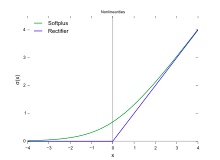


Simple example, say we want to build a Neural Network that does the following.
1. Takes two inputs, `a` and `b`.
2. Outputs `2*a + b`

Pretty simple, we can build this by hand.


In [1]:
from tensorflow import keras
import numpy as np

# take in 2 inputs
inputs = keras.layers.Input(shape=(2)) 

# connect all the inputs to 1 output node with specified weight
output = keras.layers.Dense(1, weights=[np.array([[2],[1]]), np.array([0])])(inputs)

# finish making model
model = keras.Model(inputs=inputs, outputs=output)
model.compile(keras.optimizers.Adam(), "mean_squared_error")

# model summary
model.summary()

# test on data
x = np.random.randint(0, 10, size=(10,2))
y = model.predict(x)

for i in range(x.shape[0]):
    print(x[i,:], y[i,:])


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
[1 6] [8.]
[8 6] [22.]
[3 0] [6.]
[6 6] [18.]
[8 0] [16.]
[1 0] [2.]
[0 9] [9.]
[4 3] [11.]
[6 6] [18.]
[3 3] [9.]


In this example, we built the network by hand.  Typically you don't know what the network should look like.  You let the network "learn" what it should be by optimizing it against a dataset.

In [2]:
# data
x = np.random.randint(0, 10, size=(10,2))
y = 2*x[:,0] + x[:,1]

# build model
inputs = keras.layers.Input(shape=(2)) 
output = keras.layers.Dense(1)(inputs)

model = keras.Model(inputs=inputs, outputs=output)
model.compile(keras.optimizers.Adam(learning_rate=0.01), "mean_squared_error")
model.summary()

# train model
model.fit(x,y, epochs=1000)
z = model.predict(x)

# look at results
for i in range(x.shape[0]):
    print(x[i,:], z[i,:])
print(model.get_weights())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Train on 10 samples
Epoch 1/1000
10/10 [==============================] - 0s 35ms/sample - loss: 106.5310
Epoch 2/1000
10/10 [==============================] - 0s 244us/sample - loss: 104.6306
Epoch 3/1000
10/10 [==============================] - 0s 886us/sample - loss: 102.7481
Epoch 4/1000
10/10 [==============================] - 0s 380us/sample - loss: 100.8840
Epoch 5/1000
10/10 [==============================] - 0s 390us/sample - loss: 99.0384
Epoch 6/1000
10/10 [==============================] - 0s 401us/sample - lo

Epoch 89/1000
10/10 [==============================] - 0s 565us/sample - loss: 13.5849
Epoch 90/1000
10/10 [==============================] - 0s 678us/sample - loss: 13.2235
Epoch 91/1000
10/10 [==============================] - 0s 862us/sample - loss: 12.8717
Epoch 92/1000
10/10 [==============================] - 0s 314us/sample - loss: 12.5292
Epoch 93/1000
10/10 [==============================] - 0s 493us/sample - loss: 12.1959
Epoch 94/1000
10/10 [==============================] - 0s 347us/sample - loss: 11.8715
Epoch 95/1000
10/10 [==============================] - 0s 514us/sample - loss: 11.5559
Epoch 96/1000
10/10 [==============================] - 0s 728us/sample - loss: 11.2489
Epoch 97/1000
10/10 [==============================] - 0s 501us/sample - loss: 10.9503
Epoch 98/1000
10/10 [==============================] - 0s 435us/sample - loss: 10.6599
Epoch 99/1000
10/10 [==============================] - 0s 546us/sample - loss: 10.3775
Epoch 100/1000
10/10 [=====================

Epoch 184/1000
10/10 [==============================] - 0s 851us/sample - loss: 1.9570
Epoch 185/1000
10/10 [==============================] - 0s 931us/sample - loss: 1.9371
Epoch 186/1000
10/10 [==============================] - 0s 800us/sample - loss: 1.9177
Epoch 187/1000
10/10 [==============================] - 0s 577us/sample - loss: 1.8988
Epoch 188/1000
10/10 [==============================] - 0s 597us/sample - loss: 1.8804
Epoch 189/1000
10/10 [==============================] - 0s 445us/sample - loss: 1.8624
Epoch 190/1000
10/10 [==============================] - 0s 404us/sample - loss: 1.8448
Epoch 191/1000
10/10 [==============================] - 0s 803us/sample - loss: 1.8277
Epoch 192/1000
10/10 [==============================] - 0s 966us/sample - loss: 1.8109
Epoch 193/1000
10/10 [==============================] - 0s 314us/sample - loss: 1.7945
Epoch 194/1000
10/10 [==============================] - 0s 569us/sample - loss: 1.7785
Epoch 195/1000
10/10 [=====================

Epoch 279/1000
10/10 [==============================] - 0s 447us/sample - loss: 0.9886
Epoch 280/1000
10/10 [==============================] - 0s 477us/sample - loss: 0.9823
Epoch 281/1000
10/10 [==============================] - 0s 478us/sample - loss: 0.9760
Epoch 282/1000
10/10 [==============================] - 0s 933us/sample - loss: 0.9698
Epoch 283/1000
10/10 [==============================] - 0s 497us/sample - loss: 0.9636
Epoch 284/1000
10/10 [==============================] - 0s 1ms/sample - loss: 0.9575
Epoch 285/1000
10/10 [==============================] - 0s 742us/sample - loss: 0.9514
Epoch 286/1000
10/10 [==============================] - 0s 426us/sample - loss: 0.9453
Epoch 287/1000
10/10 [==============================] - 0s 926us/sample - loss: 0.9393
Epoch 288/1000
10/10 [==============================] - 0s 342us/sample - loss: 0.9333
Epoch 289/1000
10/10 [==============================] - 0s 785us/sample - loss: 0.9274
Epoch 290/1000
10/10 [=======================

Epoch 374/1000
10/10 [==============================] - 0s 671us/sample - loss: 0.5428
Epoch 375/1000
10/10 [==============================] - 0s 605us/sample - loss: 0.5395
Epoch 376/1000
10/10 [==============================] - 0s 895us/sample - loss: 0.5362
Epoch 377/1000
10/10 [==============================] - 0s 582us/sample - loss: 0.5330
Epoch 378/1000
10/10 [==============================] - 0s 486us/sample - loss: 0.5297
Epoch 379/1000
10/10 [==============================] - 0s 581us/sample - loss: 0.5265
Epoch 380/1000
10/10 [==============================] - 0s 389us/sample - loss: 0.5234
Epoch 381/1000
10/10 [==============================] - 0s 521us/sample - loss: 0.5202
Epoch 382/1000
10/10 [==============================] - 0s 451us/sample - loss: 0.5171
Epoch 383/1000
10/10 [==============================] - 0s 353us/sample - loss: 0.5140
Epoch 384/1000
10/10 [==============================] - 0s 751us/sample - loss: 0.5109
Epoch 385/1000
10/10 [=====================

Epoch 469/1000
10/10 [==============================] - 0s 523us/sample - loss: 0.3188
Epoch 470/1000
10/10 [==============================] - 0s 345us/sample - loss: 0.3172
Epoch 471/1000
10/10 [==============================] - 0s 611us/sample - loss: 0.3156
Epoch 472/1000
10/10 [==============================] - 0s 869us/sample - loss: 0.3140
Epoch 473/1000
10/10 [==============================] - 0s 551us/sample - loss: 0.3124
Epoch 474/1000
10/10 [==============================] - 0s 869us/sample - loss: 0.3109
Epoch 475/1000
10/10 [==============================] - 0s 932us/sample - loss: 0.3094
Epoch 476/1000
10/10 [==============================] - 0s 556us/sample - loss: 0.3078
Epoch 477/1000
10/10 [==============================] - 0s 613us/sample - loss: 0.3063
Epoch 478/1000
10/10 [==============================] - 0s 425us/sample - loss: 0.3048
Epoch 479/1000
10/10 [==============================] - 0s 538us/sample - loss: 0.3033
Epoch 480/1000
10/10 [=====================

Epoch 564/1000
10/10 [==============================] - 0s 963us/sample - loss: 0.2089
Epoch 565/1000
10/10 [==============================] - 0s 372us/sample - loss: 0.2081
Epoch 566/1000
10/10 [==============================] - 0s 798us/sample - loss: 0.2073
Epoch 567/1000
10/10 [==============================] - 0s 944us/sample - loss: 0.2065
Epoch 568/1000
10/10 [==============================] - 0s 1ms/sample - loss: 0.2057
Epoch 569/1000
10/10 [==============================] - 0s 2ms/sample - loss: 0.2049
Epoch 570/1000
10/10 [==============================] - 0s 2ms/sample - loss: 0.2041
Epoch 571/1000
10/10 [==============================] - 0s 722us/sample - loss: 0.2033
Epoch 572/1000
10/10 [==============================] - 0s 564us/sample - loss: 0.2025
Epoch 573/1000
10/10 [==============================] - 0s 2ms/sample - loss: 0.2017
Epoch 574/1000
10/10 [==============================] - 0s 1ms/sample - loss: 0.2010
Epoch 575/1000
10/10 [==============================]

Epoch 659/1000
10/10 [==============================] - 0s 780us/sample - loss: 0.1489
Epoch 660/1000
10/10 [==============================] - 0s 579us/sample - loss: 0.1484
Epoch 661/1000
10/10 [==============================] - 0s 570us/sample - loss: 0.1479
Epoch 662/1000
10/10 [==============================] - 0s 577us/sample - loss: 0.1474
Epoch 663/1000
10/10 [==============================] - 0s 627us/sample - loss: 0.1469
Epoch 664/1000
10/10 [==============================] - 0s 826us/sample - loss: 0.1464
Epoch 665/1000
10/10 [==============================] - 0s 405us/sample - loss: 0.1459
Epoch 666/1000
10/10 [==============================] - 0s 1ms/sample - loss: 0.1455
Epoch 667/1000
10/10 [==============================] - 0s 529us/sample - loss: 0.1450
Epoch 668/1000
10/10 [==============================] - 0s 352us/sample - loss: 0.1445
Epoch 669/1000
10/10 [==============================] - 0s 419us/sample - loss: 0.1440
Epoch 670/1000
10/10 [=======================

Epoch 754/1000
10/10 [==============================] - 0s 652us/sample - loss: 0.1096
Epoch 755/1000
10/10 [==============================] - 0s 371us/sample - loss: 0.1092
Epoch 756/1000
10/10 [==============================] - 0s 510us/sample - loss: 0.1089
Epoch 757/1000
10/10 [==============================] - 0s 1ms/sample - loss: 0.1085
Epoch 758/1000
10/10 [==============================] - 0s 671us/sample - loss: 0.1082
Epoch 759/1000
10/10 [==============================] - 0s 561us/sample - loss: 0.1078
Epoch 760/1000
10/10 [==============================] - 0s 467us/sample - loss: 0.1075
Epoch 761/1000
10/10 [==============================] - 0s 982us/sample - loss: 0.1072
Epoch 762/1000
10/10 [==============================] - 0s 524us/sample - loss: 0.1068
Epoch 763/1000
10/10 [==============================] - 0s 595us/sample - loss: 0.1065
Epoch 764/1000
10/10 [==============================] - 0s 495us/sample - loss: 0.1061
Epoch 765/1000
10/10 [=======================

Epoch 849/1000
10/10 [==============================] - 0s 585us/sample - loss: 0.0805
Epoch 850/1000
10/10 [==============================] - 0s 761us/sample - loss: 0.0802
Epoch 851/1000
10/10 [==============================] - 0s 514us/sample - loss: 0.0799
Epoch 852/1000
10/10 [==============================] - 0s 920us/sample - loss: 0.0797
Epoch 853/1000
10/10 [==============================] - 0s 610us/sample - loss: 0.0794
Epoch 854/1000
10/10 [==============================] - 0s 500us/sample - loss: 0.0791
Epoch 855/1000
10/10 [==============================] - 0s 479us/sample - loss: 0.0789
Epoch 856/1000
10/10 [==============================] - 0s 1ms/sample - loss: 0.0786
Epoch 857/1000
10/10 [==============================] - 0s 657us/sample - loss: 0.0784
Epoch 858/1000
10/10 [==============================] - 0s 935us/sample - loss: 0.0781
Epoch 859/1000
10/10 [==============================] - 0s 1ms/sample - loss: 0.0778
Epoch 860/1000
10/10 [=========================

Epoch 944/1000
10/10 [==============================] - 0s 866us/sample - loss: 0.0580
Epoch 945/1000
10/10 [==============================] - 0s 923us/sample - loss: 0.0578
Epoch 946/1000
10/10 [==============================] - 0s 403us/sample - loss: 0.0576
Epoch 947/1000
10/10 [==============================] - 0s 663us/sample - loss: 0.0574
Epoch 948/1000
10/10 [==============================] - 0s 673us/sample - loss: 0.0572
Epoch 949/1000
10/10 [==============================] - 0s 484us/sample - loss: 0.0570
Epoch 950/1000
10/10 [==============================] - 0s 534us/sample - loss: 0.0568
Epoch 951/1000
10/10 [==============================] - 0s 2ms/sample - loss: 0.0566
Epoch 952/1000
10/10 [==============================] - 0s 2ms/sample - loss: 0.0564
Epoch 953/1000
10/10 [==============================] - 0s 879us/sample - loss: 0.0562
Epoch 954/1000
10/10 [==============================] - 0s 291us/sample - loss: 0.0560
Epoch 955/1000
10/10 [=========================

### Convolutional Neural Networks
When solving computer vision problems, local information is what's most important to a problem.  If you're trying to decide if an image contains a cat, looking at 2 pixels that are opposite corners of the image is less useful then looking at pixels that are very close to each other.  

We use Convolutional Neural Networks to solve for this, these are Neural Networks that contain Convolutional Layers.

![image.png](convolution.png)

A Convolutional Layer consists of a "filter" applied to a local patch of the input.

These filters can represent simple geometric features (vertical lines, diagnoal lines) and can represent more advanced features (cat, dog) by stacking them.

In [3]:
# Simple image problem

# Want to detect greyscale images that look like
# 1 0 
# 0 1 

# data
shape = 2
positives = [np.expand_dims(np.expand_dims(np.eye(shape,shape), axis=0), axis=3)]

base_negatives = []
for i in range(shape):
    negative = np.zeros((1,shape,shape,1))
    negative[0,i,i,0]=1
    base_negatives.append(negative)
base_negatives = np.concatenate(base_negatives,axis=0)

negatives = []
for i in range(500):    
    noise_negatives = base_negatives + np.random.uniform(0,.5,size=base_negatives.shape)
    negatives.append(noise_negatives)

x = positives + negatives
x = np.concatenate( x, axis=0)

y = np.zeros([x.shape[0],1])
y[0,0] = 1

# network

# shape x shape matrix input (greyscale image)
inputs = keras.layers.Input(shape=(shape,shape,1)) 

# apply a single convolutional filter
convolutional_layer = keras.layers.Conv2D(filters=1, kernel_size=(shape,shape), activation="sigmoid", use_bias=False)(inputs)
output = keras.layers.Flatten()(convolutional_layer)

# compile model
model = keras.Model(inputs=inputs, outputs=output)
model.compile(keras.optimizers.Adam(learning_rate=0.0001), "mean_squared_error")
model.summary()

# train model
model.fit(x,y, epochs=2000, verbose=0)
model.fit(x,y, epochs=1, verbose=2)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2, 2, 1)]         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1, 1)           4         
_________________________________________________________________
flatten (Flatten)            (None, 1)                 0         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Train on 1001 samples
1001/1001 - 0s - loss: 9.9915e-04


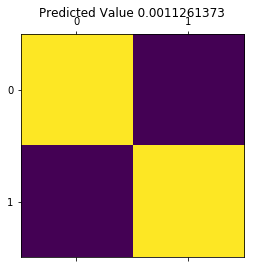

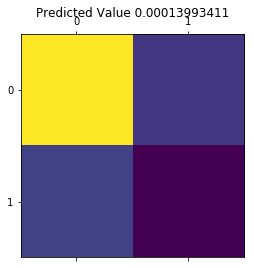

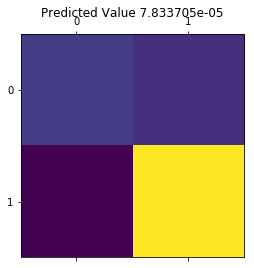

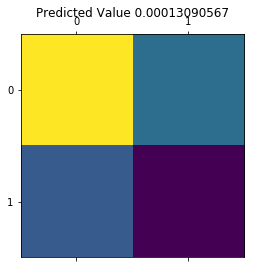

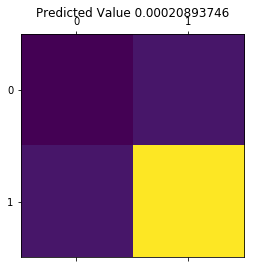

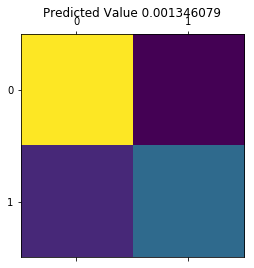

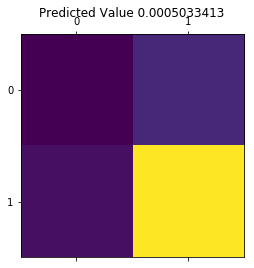

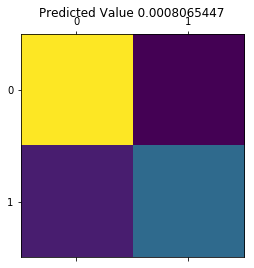

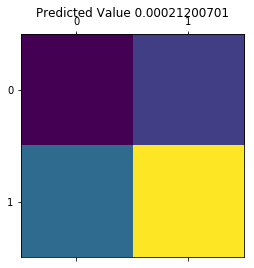

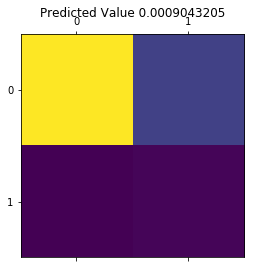

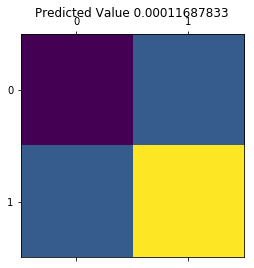

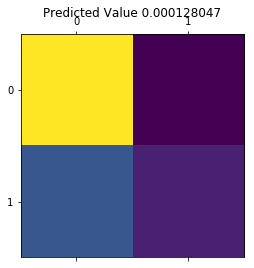

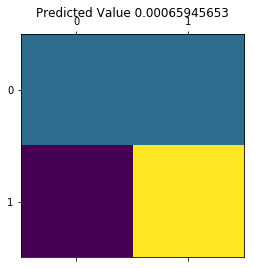

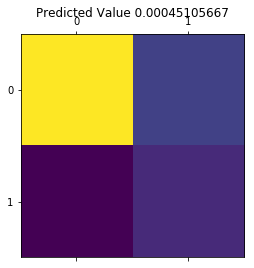

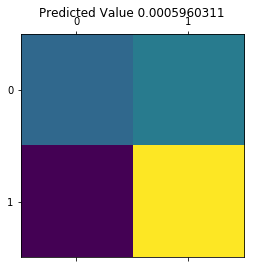

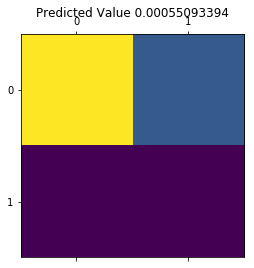

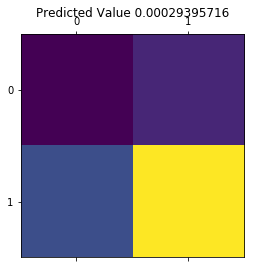

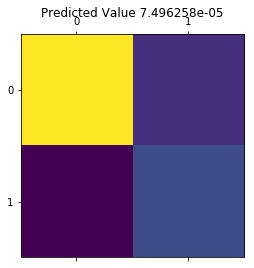

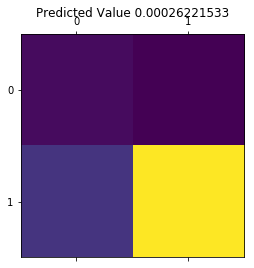

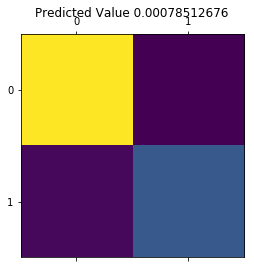

In [6]:
z = model.predict(x)

# look at results
import matplotlib.pyplot as plt
for i in range(20):
    plt.matshow(x[i,:,:,0])
    plt.title("Predicted Value " + str(z[i,0]))

plt.show()

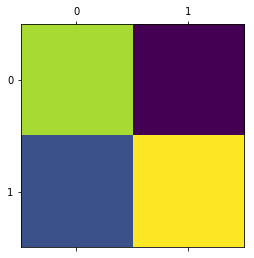

In [7]:
weights = model.get_weights()[0]
plt.matshow(weights[:,:,0,0])


Can see the diagonals have largest magnitude, the network is learning "detect the vertical line by adding the 2 diagonals up and ensuring they're large enough while ignoring the off diagonals".

### Transpose Convolutional Layer

Where a Convolutional Layer applies a matrix to a collection of points to get a single output, a Transpose Convolutional Layer applied a matrix to a single point to get multiple outputs.

![image.png](tranpose_convolution_2.png)
![image.png](tranpose_convolution.png)

* Convolutional Layers = compress information
* Transpose Convolutional Layers = decompress information

## Super Resolution CNN Networks

### Goal
Turn low resolution images into high resolution images.

### History

A method previously used to generate high resolution images was the sparse-coding based method.

Followed a few steps
1. Overlapping patches are densely cropped from the input  image  and  pre-processed  (e.g.,subtracting  mean and  normalization).
2. These  patches  are  then  encoded by  a  low-resolution  dictionary.
3. The sparse  coefficients are  passed  into  a  high-resolution  dictionary  for  reconstructing  high-resolution  patches.  
4. The overlapping  reconstructed  patches  are  aggregated  (e.g., by  weighted averaging)  to  produce  the  final  output.  


This  pipeline  is shared by most external example-based methods, which pay  particular  attention  to  learning  and  optimizing  the dictionaries or  building  efficient  mapping functions.  However,  the  rest  of  the steps  in  the  pipeline  have  been  rarely  optimized  or considered in an unified optimization framework.


### Modern Approach

Construct a Convolutional Neural Network to do all these steps in a unified framework.  This allows optimization to be applied to a single pipeline, rather then a series of disconnected ideas.


### Model Design
![image.png](sr_model.png)

Goal: Transform a 200x200 pixel image to a 400x400 pixel image.
1. Use a Transpose Convolutional Layer to map 200x200 image to a 400x400 image.
2. Use a series of Convolutional Layers to enhance this 400x400 image.
    * First Layer produces a series of feature maps.
    * Second Layer applies a nonlinear transformation to a smaller subset of features.
    * Third layer collect the data and uses it to reconstruct the image.

### Output
![image.png](sr_model_2.png)

![image.png](example.png)


## Personal Project
https://github.com/ryanhalabi/starcraft_super_resolution/

### Goal
Upscale still frames for Starcraft 5x.

### Summary
* Load image data: high and low resolution versions
* Train network to take low resolution image and output high resolution image
* Use AWS EC2 GPU instances
* Store results in AWS S3
* Use tensorboard to display results

### Datasets
* 5 unit close up image: good results
* over 500 game frame images: not so good results, need a bigger network